1. 서울역의 시간대별로 승차 인원 선 그래프를 그리세요

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', sheet_name = 3, encoding = 'cp949', skiprows=1, index_col=3)
df.shape

(597, 52)

In [32]:
data = df.iloc[:, 3:-1] #필요한 데이터만 저장

In [34]:
# 서울역의 승하차별 합
data.info() #형확인
data = data.replace(',', '', regex=True)
data = data.astype(np.int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 서울역 to 신설동
Data columns (total 48 columns):
승차       597 non-null int32
하차       597 non-null int32
승차.1     597 non-null int32
하차.1     597 non-null int32
승차.2     597 non-null int32
하차.2     597 non-null int32
승차.3     597 non-null int32
하차.3     597 non-null int32
승차.4     597 non-null int32
하차.4     597 non-null int32
승차.5     597 non-null int32
하차.5     597 non-null int32
승차.6     597 non-null int32
하차.6     597 non-null int32
승차.7     597 non-null int32
하차.7     597 non-null int32
승차.8     597 non-null int32
하차.8     597 non-null int32
승차.9     597 non-null int32
하차.9     597 non-null int32
승차.10    597 non-null int32
하차.10    597 non-null int32
승차.11    597 non-null int32
하차.11    597 non-null int32
승차.12    597 non-null int32
하차.12    597 non-null int32
승차.13    597 non-null int32
하차.13    597 non-null int32
승차.14    597 non-null int32
하차.14    597 non-null int32
승차.15    597 non-null int32
하차.15    597 non-null int32
승차

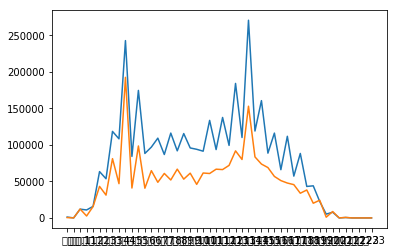

In [36]:

seoul = data.loc['서울역']
plt.plot(np.sum(seoul[::2], axis=0)) #짝수 : 승차
plt.plot(np.sum(seoul[1::2].loc['서울역'], axis=0)) #홀수 : 하차

2. 아침 9-10시 사이에 하차인원이 가장 많은 역 5개를 찾으세요

In [48]:
#모든 역의 하차 인원
data.head()
col = 11
off_9_10 = data.iloc[:,col]

In [53]:
# 상위 5개역 출력
top5 = off_9_10.sort_values(ascending=False)[:5]

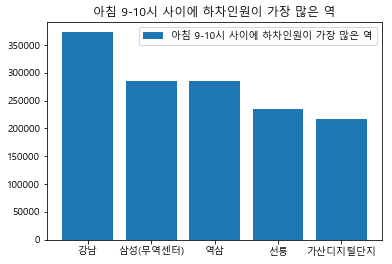

In [59]:
# bar 그래프로 출력
plt.title('아침 9-10시 사이에 하차인원이 가장 많은 역')
plt.rc('font', family = 'Malgun Gothic')
plt.bar(top5.index, top5, label='아침 9-10시 사이에 하차인원이 가장 많은 역')
plt.legend()

3. 승차인원에 비해서 하차 인원이 비율이 높은 역 5개를 찾으세요

In [60]:
# 짝수 : 승차, 홀수 : 하차
승차 = data.iloc[:, ::2]
하차 = data.iloc[:, 1::2]

In [63]:
승차합 = np.sum(승차, axis=1)
하차합 = np.sum(하차, axis=1)
하차비율 = 하차합/승차합

In [65]:
하차비율.sort_values(ascending=False)[:5]

서울역      1.730587
인천       1.688396
선릉       1.683228
고속터미널    1.540680
공덕       1.317531
dtype: float64

4. 하루 중 승차 인원이 가장 많은 시간은 언제입니까

In [73]:
승하차인원 = np.sum(data, axis=0)
승차인원 = 승하차인원[::2]
4 + np.argmax(승차인원.values)

18

5. 무임 승차 비율이 가장 높은 역 5개를 찾으세요

In [98]:
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', sheet_name = 2, encoding = 'cp949', index_col=3, skiprows=0)
df

,사용월,호선명,역ID,유임승차,유임하차,무임승차,무임하차,작업일시
지하철역,,,,,,,,
서울역,2019-05,1호선,150,"1,568,570","1,489,737","247,801","242,107",2019-06-03 10:56:20
시청,2019-05,1호선,151,"709,821","727,110","112,279","112,016",2019-06-03 10:56:20
종각,2019-05,1호선,152,"1,204,910","1,151,371","176,083","164,915",2019-06-03 10:56:20
종로3가,2019-05,1호선,153,"699,000","647,664","408,682","382,809",2019-06-03 10:56:20
종로5가,2019-05,1호선,154,"561,662","578,374","307,515","295,535",2019-06-03 10:56:20
동대문,2019-05,1호선,155,"338,565","385,522","151,904","158,360",2019-06-03 10:56:20
신설동,2019-05,1호선,156,"386,676","376,451","131,597","126,524",2019-06-03 10:56:20
제기동,2019-05,1호선,157,"297,370","286,647","353,695","375,436",2019-06-03 10:56:20
청량리(서울시립대입구),2019-05,1호선,158,"480,600","499,265","336,216","341,637",2019-06-03 10:56:20


In [99]:
subway = df.iloc[:, 3:-1]
subway = subway.replace(',', '', regex=True)
subway = subway.astype(int)
유임하차 = subway['유임하차']
무임하차 = subway['무임하차']
무임승차비율 = 무임하차/유임하차

In [100]:
y = 무임승차비율.sort_values(ascending=False)[:5]
y

지하철역
소요산    1.746963
제기동    1.309750
용문     1.127742
원덕     1.054845
지평     1.047414
dtype: float64

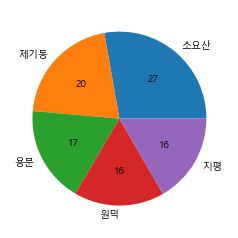

In [107]:
# m = plt.bar(y.index, y)
m = plt.pie(y, labels=y.index, autopct='%d')